# Fake News Detection with Machine Learning

Fake news is one of the biggest problems because it leads to a lot of misinformation in a particular region. Most of the time, spreading false news about a community’s political and religious beliefs can lead to riots and violence as you must have seen in the country where you live. So, to detect fake news, we can find relationships between the fake news headlines so that we can train a machine learning model that can tell us whether a particular piece of information is fake or real by simply observing the headline in the news. So in the section below, I’m going to introduce you to a machine learning project on fake news detection using the Python programming language.

https://thecleverprogrammer.com/2021/06/30/fake-news-detection-with-machine-learning/

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [5]:
df= pd.read_csv("fake_or_real_news.csv")

In [6]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [7]:
del df['Unnamed: 0']

In [8]:
del df['title']

In [9]:
d={'FAKE':0,'REAL':1}
df['label']=df['label'].map(d)

In [10]:
df.isnull().sum()

,0
text,0
label,0


In [11]:
pip install wordcloud matplotlib

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=None, contour_width=3, contour_color='white')
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [15]:
fake=df[df['label']==0]['text']
real=df[df['label']==1]['text']

In [16]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('\n','')
df['text'] = df['text'].str.replace('\d+','',regex=True)
df['text'] = df['text'].str.replace('\'','')
df['text'] = df['text'].str.replace('\r','')

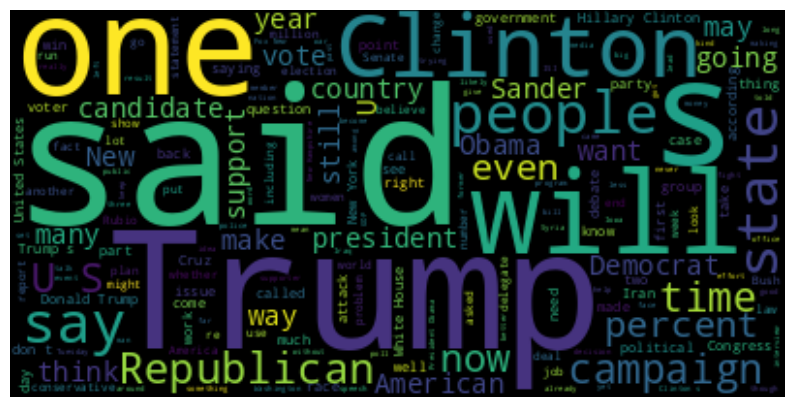

In [17]:
wc(real,'black')

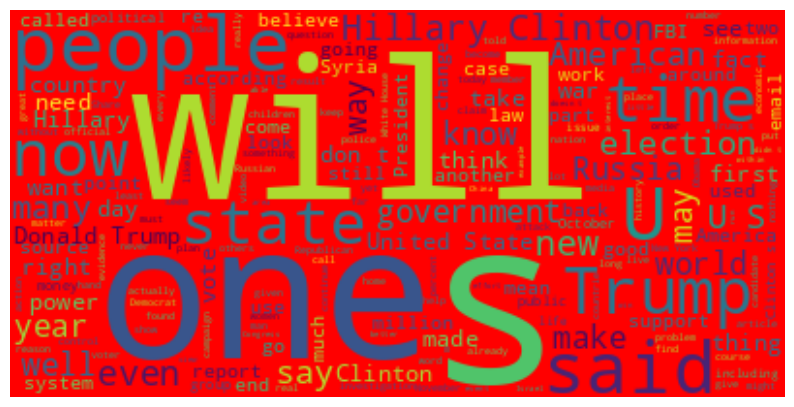

In [18]:
wc(fake,'red')

In [19]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
def lemmafn(text):

    words=TextBlob(text).words

    return[pr.stem(word) for word in words]

In [21]:
vect = CountVectorizer(ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [22]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [23]:
x=df['text']
y=df['label']

In [24]:
x=vect.fit_transform(x)

In [25]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [27]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[805 163]
 [233 700]]
LogisticRegression()  modeli eğitiliyor!..
[[896  72]
 [ 77 856]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[759 209]
 [183 750]]
RandomForestClassifier()  modeli eğitiliyor!..
[[889  79]
 [ 98 835]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[895  73]
 [102 831]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[798 170]
 [166 767]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[849 119]
 [120 813]]
MultinomialNB()  modeli eğitiliyor!..
[[845 123]
 [116 817]]
Eğitim tamamlandı.
En başarılı model:  LogisticRegression
Confusion Matrix:
[[896  72]
 [ 77 856]]
classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       968
           1       0.92      0.92      0.92       933

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      

,Accuracy,Precision,Recall,F1
LogisticRegression,0.921620,0.921620,0.921620,0.921620
GradientBoostingClassifier,0.907943,0.907943,0.907943,0.907943
RandomForestClassifier,0.906891,0.906891,0.906891,0.906891
AdaBoostClassifier,0.874277,0.874277,0.874277,0.874277
MultinomialNB,0.874277,0.874277,0.874277,0.874277
KNeighborsClassifier,0.823251,0.823251,0.823251,0.823251
DecisionTreeClassifier,0.793793,0.793793,0.793793,0.793793
BernoulliNB,0.791689,0.791689,0.791689,0.791689
